# Exploring and Transforming JSON Schemas - Lab

# Introduction

In this lab, you'll practice exploring a JSON file whose structure and schema is unknown to you. We will provide you with limited information, and you will explore the dataset to answer the specified question.

## Objectives

You will be able to:

* Use the `json` module to load and parse JSON documents
* Explore and extract data using unknown JSON schemas
* Convert JSON to a pandas dataframe

## Your Task: Create a Bar Graph of the Top 10 States with the Highest Asthma Rates for Adults Age 18+

The information you need to create this graph is located in `disease_data.json`. It contains both data and metadata.

You are given the following codebook/data dictionary:

* The actual data values are associated with the key `'DataValue'`
* The state names are associated with the key `'LocationDesc'`
* To filter to the appropriate records, make sure:
  * The `'Question'` is `'Current asthma prevalence among adults aged >= 18 years'`
  * The `'StratificationCategoryID1'` is `'OVERALL'`
  * The `'DataValueTypeID'` is `'CRDPREV'`
  * The `'LocationDesc'` is not `'United States'`
  
The provided JSON file contains both data and metadata, and you will need to parse the metadata in order to understand the meanings of the values in the data.

No further information about the structure of this file is provided.

## Load the JSON File

Load the data from the file `disease_data.json` into a variable `data`.

In [43]:
# Your code here 

#import modules
import json 

import pandas as pd

#Load JSON file
with open('disease_data.json', "r", encoding="utf-8") as file:
        data = json.load(file)  # Parse JSON data
       
#Convert to a pandas dataframe
df = pd.json_normalize(data)

#View first five entries
print(df.head())

                                                data meta.view.id  \
0  [[1, FF49C41F-CE8D-46C4-9164-653B1227CF6F, 1, ...    g4ie-h725   

                          meta.view.name  \
0  U.S. Chronic Disease Indicators (CDI)   

                               meta.view.attribution  \
0  Centers for Disease Control and Prevention, Na...   

         meta.view.attributionLink  meta.view.averageRating  \
0  http://www.cdc.gov/nccdphp/dph/                        0   

           meta.view.category  meta.view.createdAt  \
0  Chronic Disease Indicators           1463517008   

                               meta.view.description meta.view.displayType  \
0  CDC's Division of Population Health provides c...                 table   

   ...  meta.view.owner.displayName  meta.view.owner.screenName  \
0  ...         DPH Public Inquiries        DPH Public Inquiries   

   meta.view.owner.type  meta.view.rights meta.view.tableAuthor.id  \
0           interactive            [read]                isr2

## Explore the Overall Structure

What is the overall data type of `data`?

In [44]:
# Your code here

print(type(data))


<class 'dict'>


What are the keys?

In [45]:
# Your code here

print(data.keys())

dict_keys(['meta', 'data'])


What are the data types associates with those keys?

In [46]:
# Your code here (data)
if 'data' in data:
            print("Data types of values in the 'data' section:")
            for record in data['data'][:5]:  # Checking first 5 records 
                # Check data type of each item in the record 
                print([type(item) for item in record])  # Print type of each item in the list
else:
    print("'data' key not found in the JSON.")

Data types of values in the 'data' section:
[<class 'int'>, <class 'str'>, <class 'int'>, <class 'int'>, <class 'str'>, <class 'int'>, <class 'str'>, <class 'NoneType'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'NoneType'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'NoneType'>, <class 'NoneType'>, <class 'NoneType'>, <class 'NoneType'>, <class 'list'>, <class 'NoneType'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'NoneType'>, <class 'NoneType'>, <class 'NoneType'>, <class 'NoneType'>]
[<class 'int'>, <class 'str'>, <class 'int'>, <class 'int'>, <class 'str'>, <class 'int'>, <class 'str'>, <class 'NoneType'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'NoneType'>, <class 'str'>, <cl

In [47]:
# Your code here (metadata)
if 'meta' in data:
            print("Data types of values in the 'meta' section:")
            # Check data type of each item in the 'meta' section 
            for key, value in data['meta'].items():
                print(f"Key: {key}, Type: {type(value)}")  # Print key and data type of each value
else:
    print("'meta' key not found in the JSON.")

Data types of values in the 'meta' section:
Key: view, Type: <class 'dict'>


Perform additional exploration to understand the contents of these values. For dictionaries, what are their keys? For lists, what is the length, and what does the first element look like?

In [49]:

        
        # Check if 'data' exists and is a list
        if 'data' in data and isinstance(data['data'], list):
            print("Checking the structure of the 'data' section...\n")

            # Print type of the first element in 'data'
            first_record = data['data'][0]
            print(f"Type of first record: {type(first_record)}")
            
            # Print first record to understand its structure
            print("\nFirst record in 'data':")
            print(first_record)

            # If the first record is a list, print its length and first element
            if isinstance(first_record, list):
                print(f"\n'First record' is a list with length: {len(first_record)}")
                print(f"First element of the first record: {first_record[0]}")




Checking the structure of the 'data' section...

Type of first record: <class 'list'>

First record in 'data':
[1, 'FF49C41F-CE8D-46C4-9164-653B1227CF6F', 1, 1527194521, '959778', 1527194521, '959778', None, '2016', '2016', 'US', 'United States', 'BRFSS', 'Alcohol', 'Binge drinking prevalence among adults aged >= 18 years', None, '%', 'Crude Prevalence', '16.9', '16.9', '*', '50 States + DC: US Median', '16', '18', 'Overall', 'Overall', None, None, None, None, [None, None, None, None, None], None, '59', 'ALC', 'ALC2_2', 'CRDPREV', 'OVERALL', 'OVR', None, None, None, None]

'First record' is a list with length: 42
First element of the first record: 1


In [48]:
# Your code here (add additional cells as needed)


# Path to your JSON file
file_path = "disease_data.json"


        
        # Check for lists in the 'data' section
if 'data' in data:
            print("Checking for lists in the 'data' section:")
            if isinstance(data['data'], list):  # Ensure 'data' is a list
                for index, record in enumerate(data['data'][:5]):  # Checking the first 5 records (adjust as needed)
                    print(f"\nRecord {index + 1}:")
                    for key, value in record.items():
                        if isinstance(value, list):  # Check if any value in the record is a list
                            print(f"  Key: {key} is a list")
                            print(f"  Length of the list: {len(value)}")
                            print(f"  First element of the list: {value[0]}")
                        else:
                            print(f"  Key: {key} is not a list.")
            else:
                print("'data' is not a list.")
else:
    print("'data' key not found in the JSON.")






Checking for lists in the 'data' section:

Record 1:


AttributeError: 'list' object has no attribute 'items'

As you likely identified, we have a list of lists forming the `'data'`. In order to make sense of that list of lists, we need to find the meaning of each index, i.e. the names of the columns.

## Identify the Column Names

Look through the metadata to find the *names* of the columns, and assign that variable to `column_names`. This should be a list of strings. (If you just get the values associated with the `'columns'` key, you will have a list of dictionaries, not a list of strings.)

In [50]:
# Your code here (add additional cells as needed)



try:
    with open(file_path, "r", encoding="utf-8") as file:
        data = json.load(file)

        # Check if 'meta' exists and contains column names
        if 'meta' in data and isinstance(data['meta'], dict):
            print("Checking 'meta' for column names...\n")

            # Find the key that contains column names (often 'view' → 'columns')
            if 'view' in data['meta'] and 'columns' in data['meta']['view']:
                columns = data['meta']['view']['columns']
                column_names = [col['name'] for col in columns]  # Extract names
                print("Column names found:\n", column_names)
            else:
                print("'view' or 'columns' not found in 'meta'.")




Checking 'meta' for column names...

Column names found:
 ['sid', 'id', 'position', 'created_at', 'created_meta', 'updated_at', 'updated_meta', 'meta', 'YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource', 'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType', 'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol', 'DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory1', 'Stratification1', 'StratificationCategory2', 'Stratification2', 'StratificationCategory3', 'Stratification3', 'GeoLocation', 'ResponseID', 'LocationID', 'TopicID', 'QuestionID', 'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1', 'StratificationCategoryID2', 'StratificationID2', 'StratificationCategoryID3', 'StratificationID3']


The following code checks that you have the correct column names:

In [51]:
# Run this cell without changes

# 42 total columns
assert len(column_names) == 42

# Each name should be a string, not a dict
assert type(column_names[0]) == str and type(column_names[-1]) == str

# Check that we have some specific strings
assert "DataValue" in column_names
assert "LocationDesc" in column_names
assert "Question" in column_names
assert "StratificationCategoryID1" in column_names
assert "DataValueTypeID" in column_names

## Filter Rows Based on Columns

Recall that we only want to include records where:

* The `'Question'` is `'Current asthma prevalence among adults aged >= 18 years'`
* The `'StratificationCategoryID1'` is `'OVERALL'`
* The `'DataValueTypeID'` is `'CRDPREV'`
* The `'LocationDesc'` is not `'United States'`

Combining knowledge of the data and metadata, filter out the rows of data that are not relevant.

(You may find the `pandas` library useful here.)

In [52]:
# Your code here (add additional cells as needed)

# Convert data to a Pandas DataFrame
df = pd.DataFrame(data['data'], columns=column_names)

# Convert 'DataValue' to numeric (coerce errors to NaN)
df['DataValue'] = pd.to_numeric(df['DataValue'], errors='coerce')

In [53]:
# Apply filtering conditions
filtered_df = df[
    (df['Question'] == "Current asthma prevalence among adults aged >= 18 years") &
    (df['StratificationCategoryID1'] == "OVERALL") &
    (df['DataValueTypeID'] == "CRDPREV") &
    (df['LocationDesc'] != "United States") &
    (df['DataValue'].notna())  # Ensure we have valid data values
]

# Display first few rows of filtered data
print(filtered_df.head())

       sid                                    id  position  created_at  \
9371  9369  6BEC61D0-E04B-44BA-8170-F7D6A4C40A09      9369  1527194523   
9372  9370  5D6EDDA9-B241-4498-A262-ED20AB78C44C      9370  1527194523   
9373  9371  5FCE0D49-11FD-4545-B9E7-14F503123105      9371  1527194523   
9374  9372  68F151CE-3084-402C-B672-78A43FBDE287      9372  1527194523   
9375  9373  D3F00ED2-A069-4E40-B42B-5A2528A91B6F      9373  1527194523   

     created_meta  updated_at updated_meta  meta YearStart YearEnd  ...  \
9371       959778  1527194523       959778  None      2016    2016  ...   
9372       959778  1527194523       959778  None      2016    2016  ...   
9373       959778  1527194523       959778  None      2016    2016  ...   
9374       959778  1527194523       959778  None      2016    2016  ...   
9375       959778  1527194523       959778  None      2016    2016  ...   

     LocationID TopicID QuestionID DataValueTypeID StratificationCategoryID1  \
9371         01     AST 

In [55]:
#Check the no. of records

# Get the number of records in the filtered data
num_records = filtered_df.shape[0]
num_records

54

You should have 54 records after filtering.

## Extract the Attributes Required for Plotting

For each record, the only information we actually need for the graph is the `'DataValue'` and `'LocationDesc'`. Create a list of records that only contains these two attributes.

Also, make sure that the data values are numbers, not strings.

In [56]:
# Your code here (create additional cells as needed)

# Select only the required columns
plot_data = filtered_df[['LocationDesc', 'DataValue']].copy()

In [59]:
# Print first five records to check
print(plot_data[:5])

     LocationDesc  DataValue
9371      Alabama        9.7
9372       Alaska        8.8
9373      Arizona        9.4
9374     Arkansas        8.5
9375   California        7.8


## Find Top 10 States

Sort by `'DataValue'` and limit to the first 10 records.

In [61]:
# Your code here (add additional cells as needed)

# Sort by DataValue in descending order and select the top 10 records
top_10_states = plot_data.sort_values(by='DataValue', ascending=False).head(10)

top_10_states

,LocationDesc,DataValue
9390,Maine,12.2
9402,New Mexico,11.8
9419,West Virginia,11.8
9388,Kentucky,11.6
9400,New Hampshire,11.4
9413,Tennessee,10.9
9393,Michigan,10.9
9382,Hawaii,10.7
9423,Puerto Rico,10.7
9410,Rhode Island,10.7


## Separate the Names and Values for Plotting

Assign the names of the top 10 states to a list-like variable `names`, and the associated values to a list-like variable `values`. Then the plotting code below should work correctly to make the desired bar graph.

In [68]:
# Replace None with appropriate code

#Create list of names
names = []
names = top_10_states['LocationDesc'].tolist()

#Create list of values
values = []
values = top_10_states['DataValue'].tolist()

print(names)

print(values)

['Maine', 'New Mexico', 'West Virginia', 'Kentucky', 'New Hampshire', 'Tennessee', 'Michigan', 'Hawaii', 'Puerto Rico', 'Rhode Island']
[12.2, 11.8, 11.8, 11.6, 11.4, 10.9, 10.9, 10.7, 10.7, 10.7]


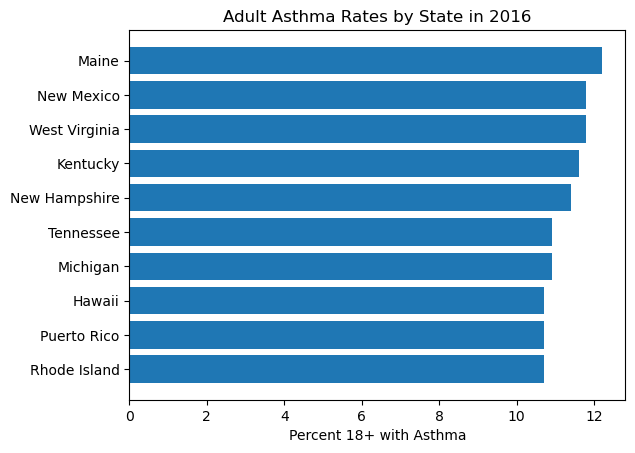

In [69]:
# Run this cell without changes

import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.barh(names[::-1], values[::-1]) # Values inverted so highest is at top
ax.set_title('Adult Asthma Rates by State in 2016')
ax.set_xlabel('Percent 18+ with Asthma');

## Summary

In this lab you got some extended practice exploring the structure of JSON files and visualizing data.